In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./archive/startup_funding.csv')
data.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [3]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [4]:
sorted(data['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [5]:
data['Investors Name'] = data['Investors Name'].fillna('Undisclosed')

In [6]:
sorted(data['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


## Preprocessing steps:
- Drop remarks columns
- set index to set the Sr No as index
- rename columns
- convert amount into Rupees
- date columns(convert object into date time)
- drop na(dropping of all null values)
- split investors name

In [8]:
# drop remarks column
data.drop(columns = 'Remarks',inplace = True)

In [9]:
data.set_index('Sr No',inplace = True)


In [10]:
data.head(2)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [11]:
data.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [12]:
data.rename(columns = {
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'Startup',
    'Industry Vertical':'Vertical',
    'SubVertical':'subvertical',
    'City  Location':'City', 
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3044 non-null   object
 1   Startup      3044 non-null   object
 2   Vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   City         2864 non-null   object
 5   investors    3044 non-null   object
 6   round        3040 non-null   object
 7   amount       2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [14]:
#since the amount has null values, it's null value will be replaced with zero
# data['amount'] = data['amount'].fillna(0,inplace = True)

In [15]:
data['amount'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [16]:
data['amount'].fillna(0,inplace = True)

In [17]:
data['amount'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3044 entries, 1 to 3044
Series name: amount
Non-Null Count  Dtype 
--------------  ----- 
3044 non-null   object
dtypes: object(1)
memory usage: 47.6+ KB


In [18]:
data['amount'] = data['amount'].str.replace(',','')
data['amount'].unique()

array(['200000000', '8048394', '18358860', '3000000', '1800000',
       '9000000', '150000000', '6000000', '70000000', '50000000',
       '20000000', '12000000', '30000000', '5900000', '2000000',
       '231000000', '486000', '1500000', 'undisclosed', '26000000',
       '17411265', '1300000', '135000000', '300000', '220000000',
       '15800000', '283000000', '1000000000', '45000000', '585000000',
       'unknown', '4500000', '3300000', '5000000', '18000000', '1000000',
       '10000000', '450000000', '1600000', '140000000', '38080000',
       '125000000', '11000000', '51000000', '37000000', '500000',
       '110000000', '15000000', '6590000', 'Undisclosed', '3900000000',
       '19000000', '2500000', '145000', '60000000', '16000000', '5750000',
       '319605', '4889975.54', '75000000', '2739034.68', '15109500.00',
       '430200', '15500000', '52000000', '3584000', '3400000', '868600',
       '11500000', '5600000', '17000000', '430665', '3591375', '200000',
       '3500000', '6320820

In [19]:
data['amount'] = data['amount'].str.replace('Undisclosed','0')
data['amount'] = data['amount'].str.replace('undisclosed','0')
data['amount'] = data['amount'].str.replace('unknown','0')
data['amount'] = data['amount'].str.replace('Unknown','0')

In [20]:
data['amount'].unique()

array(['200000000', '8048394', '18358860', '3000000', '1800000',
       '9000000', '150000000', '6000000', '70000000', '50000000',
       '20000000', '12000000', '30000000', '5900000', '2000000',
       '231000000', '486000', '1500000', '0', '26000000', '17411265',
       '1300000', '135000000', '300000', '220000000', '15800000',
       '283000000', '1000000000', '45000000', '585000000', '4500000',
       '3300000', '5000000', '18000000', '1000000', '10000000',
       '450000000', '1600000', '140000000', '38080000', '125000000',
       '11000000', '51000000', '37000000', '500000', '110000000',
       '15000000', '6590000', '3900000000', '19000000', '2500000',
       '145000', '60000000', '16000000', '5750000', '319605',
       '4889975.54', '75000000', '2739034.68', '15109500.00', '430200',
       '15500000', '52000000', '3584000', '3400000', '868600', '11500000',
       '5600000', '17000000', '430665', '3591375', '200000', '3500000',
       '6320820', '2443495', '307000', '14342000+',

In [21]:
data['amount'].fillna(0,inplace = True)

In [22]:
data['amount1'] = data.apply(lambda ele:0 if ele['amount'] in ('\\\\xc2\\\\xa020000000',
       '\\\\xc2\\\\xa016200000', '\\\\xc2\\\\xa0N/A',
       '\\\\xc2\\\\xa0600000', '\\\\xc2\\\\xa0685000',
       '\\\\xc2\\\\xa019350000', '\\\\xc2\\\\xa05000000',
       '\\\\xc2\\\\xa010000000','14342000+') else ele['amount'],axis = 1)

In [23]:
data['amount1'].unique()

array(['200000000', '8048394', '18358860', '3000000', '1800000',
       '9000000', '150000000', '6000000', '70000000', '50000000',
       '20000000', '12000000', '30000000', '5900000', '2000000',
       '231000000', '486000', '1500000', '0', '26000000', '17411265',
       '1300000', '135000000', '300000', '220000000', '15800000',
       '283000000', '1000000000', '45000000', '585000000', '4500000',
       '3300000', '5000000', '18000000', '1000000', '10000000',
       '450000000', '1600000', '140000000', '38080000', '125000000',
       '11000000', '51000000', '37000000', '500000', '110000000',
       '15000000', '6590000', '3900000000', '19000000', '2500000',
       '145000', '60000000', '16000000', '5750000', '319605',
       '4889975.54', '75000000', '2739034.68', '15109500.00', '430200',
       '15500000', '52000000', '3584000', '3400000', '868600', '11500000',
       '5600000', '17000000', '430665', '3591375', '200000', '3500000',
       '6320820', '2443495', '307000', 0, '22600000

In [24]:
data['amount1'] = data['amount1'].astype(float)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3044 non-null   object 
 1   Startup      3044 non-null   object 
 2   Vertical     2873 non-null   object 
 3   subvertical  2108 non-null   object 
 4   City         2864 non-null   object 
 5   investors    3044 non-null   object 
 6   round        3040 non-null   object 
 7   amount       3044 non-null   object 
 8   amount1      3044 non-null   float64
dtypes: float64(1), object(8)
memory usage: 237.8+ KB


In [26]:
data.drop(columns = 'amount',inplace = True)

In [27]:
data['amount1'] = data.apply(lambda ele:(ele['amount1']*82.5)/10000000,axis = 1) #converting into crores

In [28]:
data.head(2)

,Date,Startup,Vertical,subvertical,City,investors,round,amount1
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.39925


In [29]:
data['Date'] = data['Date'].str.replace('05/072018','05/07/2018')

In [30]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')

/home/saima/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/saima/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/saima/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/saima/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/12/2019' in DD/MM/YYYY form

In [31]:
data['Date'].dt.month

Sr No
1       9.0
2       1.0
3       9.0
4       2.0
5       2.0
       ... 
3040    1.0
3041    1.0
3042    1.0
3043    1.0
3044    1.0
Name: Date, Length: 3044, dtype: float64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3041 non-null   datetime64[ns]
 1   Startup      3044 non-null   object        
 2   Vertical     2873 non-null   object        
 3   subvertical  2108 non-null   object        
 4   City         2864 non-null   object        
 5   investors    3044 non-null   object        
 6   round        3040 non-null   object        
 7   amount1      3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [33]:
data.dropna(subset=['Date','Startup','City','investors','round','amount1','Vertical'],inplace = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2858 non-null   datetime64[ns]
 1   Startup      2858 non-null   object        
 2   Vertical     2858 non-null   object        
 3   subvertical  2098 non-null   object        
 4   City         2858 non-null   object        
 5   investors    2858 non-null   object        
 6   round        2858 non-null   object        
 7   amount1      2858 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 201.0+ KB


In [35]:
data.to_csv('startup_clean.csv',index = False)

In [36]:
data.columns

Index(['Date', 'Startup', 'Vertical', 'subvertical', 'City', 'investors',
       'round', 'amount1'],
      dtype='object')

In [37]:
sorted(set(data['investors'].str.split(',').sum())) #for investors cleaning

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [38]:
data[data['investors'].str.contains('IDG Ventures')].head()[['Date','Startup','Vertical','City','round','amount1']]

,Date,Startup,Vertical,City,round,amount1
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,990.000000
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,18.975000


In [47]:
#biggest investments
data[data['investors'].str.contains('IDG Ventures')].groupby('Startup')['amount1'].sum().sort_values(ascending = False).head()

Startup
Cure Fit    990.00
Lenskart    495.00
Bizongo     206.25
CureFit     206.25
Curefit     123.75
Name: amount1, dtype: float64

<AxesSubplot: ylabel='amount1'>

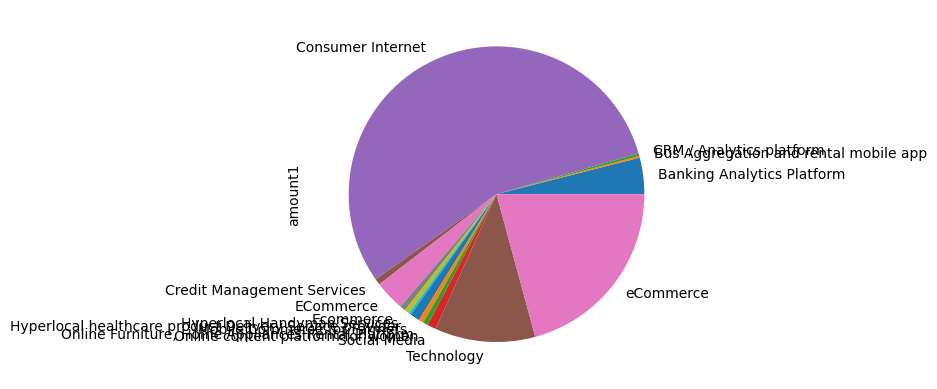

In [55]:
data[data['investors'].str.contains('IDG Ventures')].groupby('Vertical')['amount1'].sum().plot(kind = 'pie')

In [56]:
#yoy investment graph
data['Year'] = data['Date'].dt.year

In [57]:
data['Year']

Sr No
1       2020
2       2020
3       2020
4       2020
5       2020
        ... 
2869    2015
2870    2015
2871    2015
2872    2015
2873    2015
Name: Year, Length: 2858, dtype: int64

<AxesSubplot: xlabel='Year'>

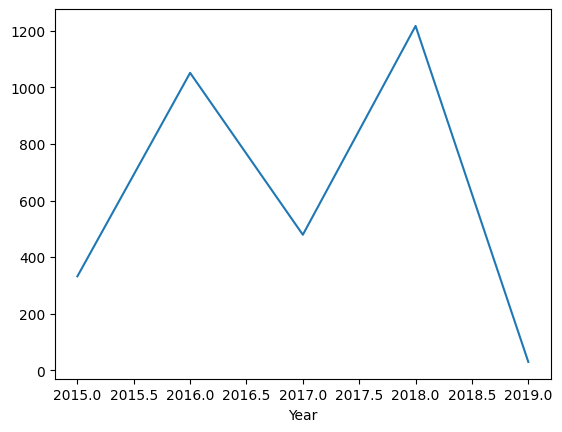

In [60]:
data[data['investors'].str.contains('IDG Ventures')].groupby('Year')['amount1'].sum().plot()

In [61]:
#how to find similar invstors
# Can group based on sectors
data

,Date,Startup,Vertical,subvertical,City,investors,round,amount1,Year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


In [62]:
#um of total funds
data['amount1'].sum()

301765.32363450003

In [68]:
data.groupby('Startup')['amount1'].max().sort_values(ascending = False).head(1).values[0]

32175.0

In [72]:
#average funding amount
data.groupby('Startup')['amount1'].sum().mean()

129.67998437236798

In [81]:
#total funded startup
data[~(data['amount1'] == 0)]['Startup'].count()

1926

In [84]:
#MoM - total+count
data['Month'] = data['Date'].dt.month

In [87]:
data.groupby(['Year','Month'])['Startup'].count().reset_index() #No of fundings

,Year,Month,Startup
0,2015,1,36
1,2015,2,14
2,2015,3,37
3,2015,4,66
4,2015,5,54
...,...,...,...
58,2019,12,11
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [89]:
temp_df = data.groupby(['Year','Month'])['amount1'].sum().reset_index()
temp_df['Year'].astype(str) + '-' +temp_df['Month'].astype(str)

0      2015-1
1      2015-2
2      2015-3
3      2015-4
4      2015-5
       ...   
58    2019-12
59     2020-1
60     2020-2
61     2020-9
62    2020-10
Length: 63, dtype: object